# Generate FCC Block Coil v5ari204 with STEAM-SIGMA
<img src = "FCC_blockCoil_v5ari204_DA.png" width=50%>

# Import Java gateway and STEAM API (SING, UTILS)

In [1]:
from py4j.java_gateway import launch_gateway, java_import, JavaGateway, JavaObject, GatewayParameters, Py4JNetworkError

# Launch a Gateway in a new Java process, this returns port
port = launch_gateway(classpath='../../steam/*')

# JavaGateway instance is connected to a Gateway instance on the Java side
gateway = JavaGateway(gateway_parameters=GatewayParameters(port=port))

import numpy as np
import math
import pandas as pd
import matplotlib.patches as patches
import matplotlib.lines as lines
import matplotlib.pyplot as plt
%matplotlib inline

Point = gateway.jvm.model.geometry.basic.Point
Line = gateway.jvm.model.geometry.basic.Line
Arc = gateway.jvm.model.geometry.basic.Arc
Circumference = gateway.jvm.model.geometry.basic.Circumference
Area = gateway.jvm.model.geometry.basic.Area
HyperLine = gateway.jvm.model.geometry.basic.HyperLine
Element = gateway.jvm.model.geometry.Element
Domain = gateway.jvm.model.domains.Domain
AirDomain = gateway.jvm.model.domains.database.AirDomain
AirFarFieldDomain = gateway.jvm.model.domains.database.AirFarFieldDomain
IronDomain = gateway.jvm.model.domains.database.IronDomain
HoleDomain = gateway.jvm.model.domains.database.HoleDomain
CoilDomain = gateway.jvm.model.domains.database.CoilDomain
MatDatabase = gateway.jvm.model.materials.database.MatDatabase
CriticalSurfaceFitEnum = gateway.jvm.model.geometry.database.Cable.CriticalSurfaceFitEnum
ResitivityCopperFitEnum = gateway.jvm.model.geometry.database.Cable.ResitivityCopperFitEnum
ConfigSigma = gateway.jvm.config.ConfigSigma
TxtSigmaServer = gateway.jvm.server.TxtSigmaServer
MagnetMPHBuilder = gateway.jvm.comsol.MagnetMPHBuilder
Cable = gateway.jvm.model.geometry.coil.Cable
Winding = gateway.jvm.model.geometry.coil.Winding
Pole = gateway.jvm.model.geometry.coil.Pole
Coil = gateway.jvm.model.geometry.coil.Coil

In [2]:
import sys
import os
from pathlib import Path

curr_dir = Path(os.path.split(os.getcwd())[0])
utilities_dir = str(curr_dir.parent / 'steam')

if utilities_dir not in sys.path:
    sys.path.append(utilities_dir)
    
import plotting as p
import arrays as a

(-1.65, 1.65)

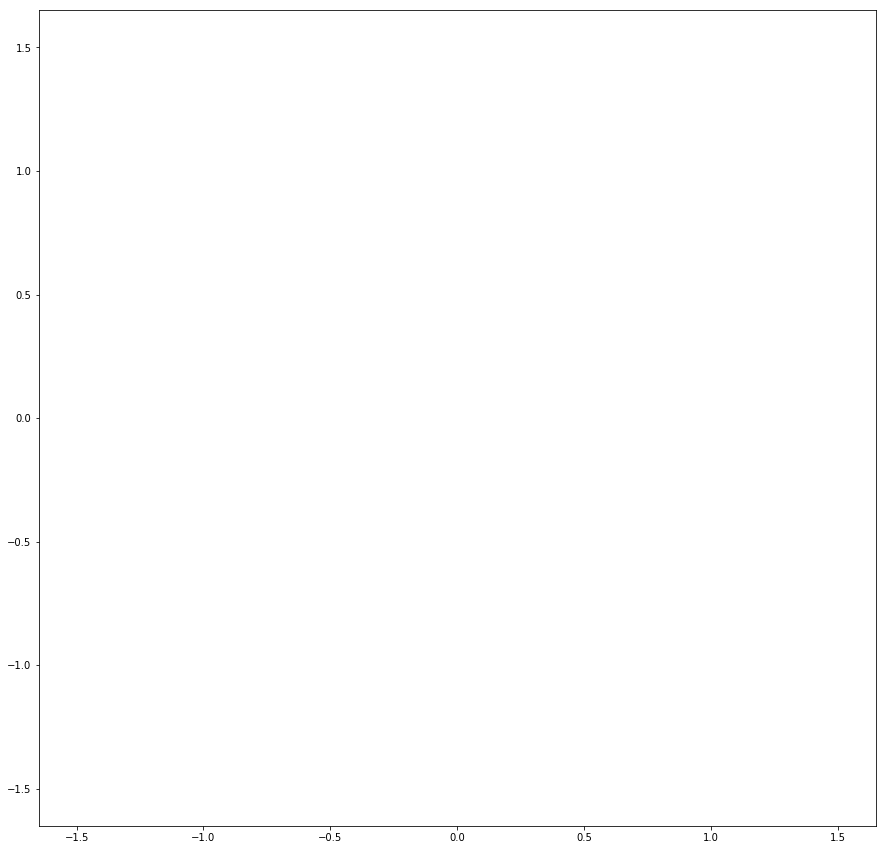

In [3]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes()
ax.set_xlim(-1.65, 1.65)
ax.set_ylim(-1.65, 1.65)

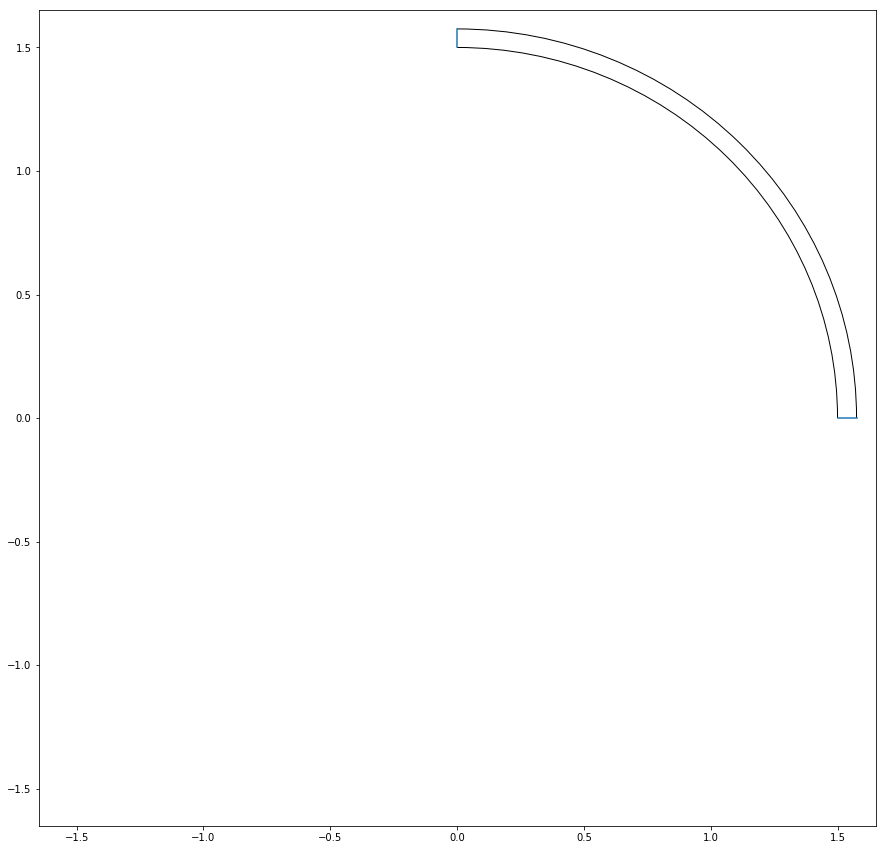

In [4]:
#Air far field
r = 1.5

kpc = Point.ofCartesian(0.0, 0.0)
kp1 = Point.ofCartesian(r, 0.0)
kp2 = Point.ofCartesian(0.0, r)

kp1_far = Point.ofCartesian(r*1.05, 0.0)
kp2_far = Point.ofCartesian(0.0, r*1.05)

ln1_far = Line.ofEndPoints(kp1, kp1_far)
ln2_far = Arc.ofEndPointsCenter(kp1_far, kp2_far, kpc)
ln3_far = Line.ofEndPoints(kp2_far, kp2)
ln4_far = Arc.ofEndPointsCenter(kp1, kp2, kpc)

ar1_far = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln1_far, ln2_far, ln3_far, ln4_far)))
el1_far = Element("FAR_El1", ar1_far)

air_far_field = a.create_element_array(gateway, (el1_far))

p.plot_multiple_areas(ax, [ar1_far])
fig

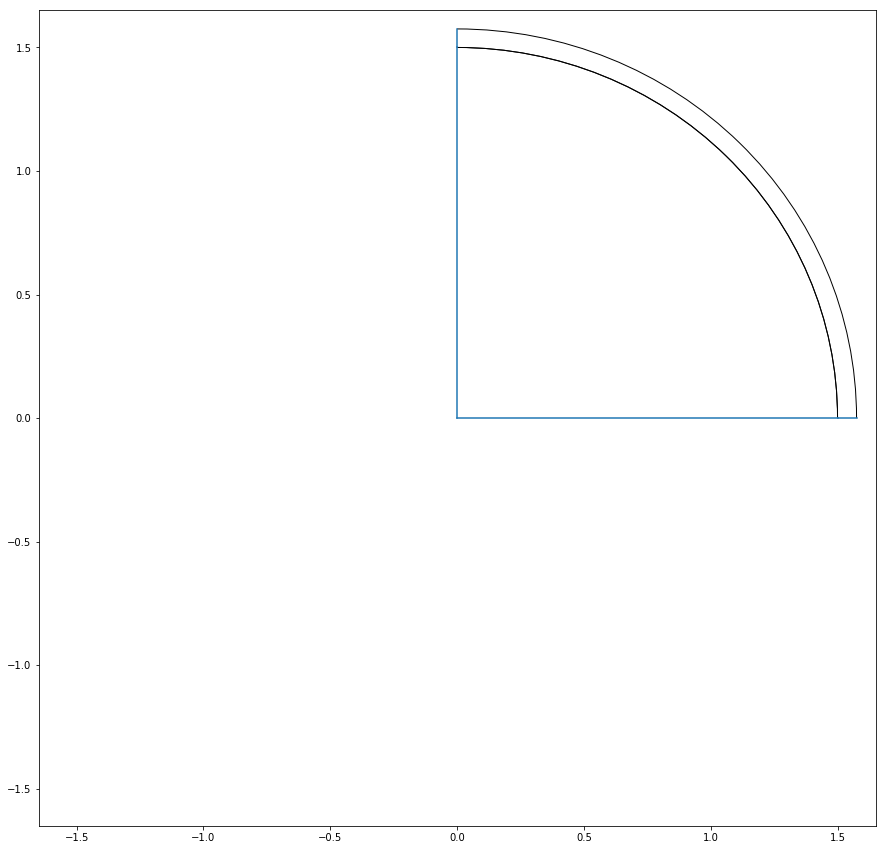

In [5]:
# Air domain
r = 1.5

kpc = Point.ofCartesian(0.0, 0.0)
kp1 = Point.ofCartesian(r, 0.0)
kp2 = Point.ofCartesian(0.0, r)

ln1 = Line.ofEndPoints(kpc, kp1)
ln2 = Arc.ofEndPointsCenter(kp1, kp2, kpc)
ln3 = Line.ofEndPoints(kp2, kpc)

ar1 = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln1, ln2, ln3)))

el1 = Element("AIR_El1", ar1)

air = a.create_element_array(gateway, (el1))

p.plot_multiple_areas(ax, [ar1])
fig

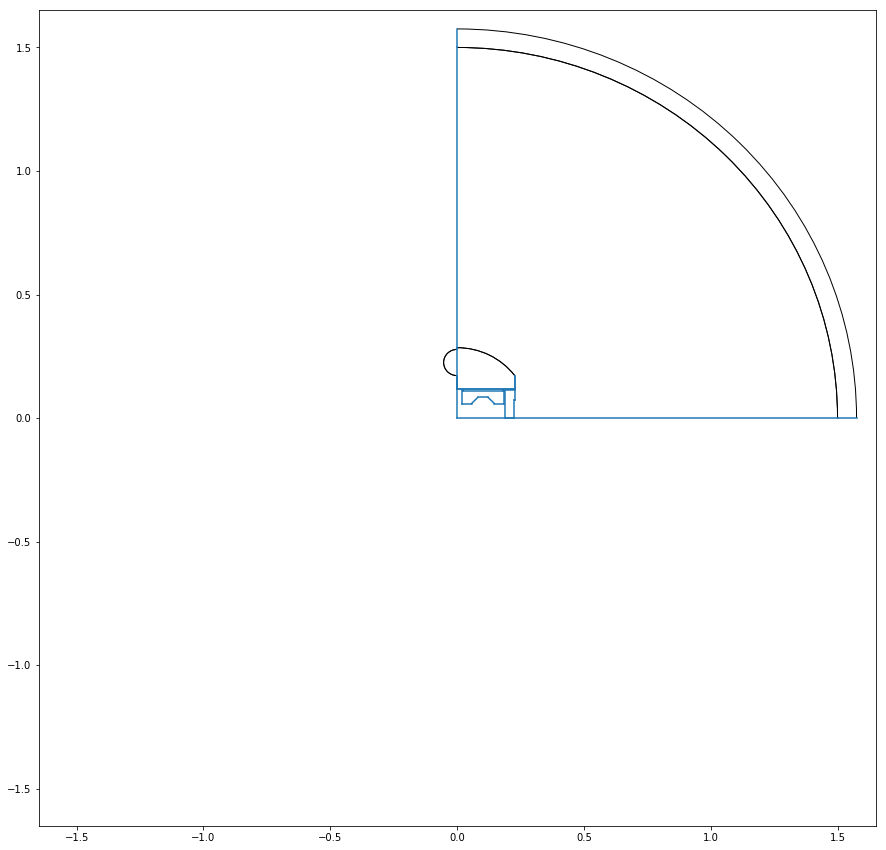

In [6]:
# iron yoke
xbeam = 102e-3
xinhpad = 187e-3
xinhpad_left = 2*xbeam-xinhpad
hpad_th = 40e-3
xouhpad = xinhpad+hpad_th
xthhpad = xouhpad-xinhpad
slot = 3e-3
yhpadslot = 75e-3
rhpad = xouhpad-xinhpad
yinvpad = 59e-3
youvpad = 112e-3
ythvpad = youvpad-yinvpad
xthvpad = 5e-3
xnickpad1 = xbeam+20e-3
xnickpad1_left = 2*xbeam-xnickpad1
xnickpad2 = 25e-3
ynickpad = 25e-3
xvshim = xinhpad-2.5e-3
xvshim_left = 2*xbeam-xvshim
xpatcent = xvshim_left-2.5e-3
xinyoke = xouhpad+5e-3
routyoke = 570e-3/2
yinyoke = youvpad+5e-3
rhole1 = 53e-3
yhole1 = 225e-3

kp1 = Point.ofCartesian(xinhpad, 0.0)
kp2 = Point.ofCartesian(xouhpad-slot, 0.0)
kp3 = Point.ofCartesian(xouhpad-slot, yhpadslot)
kp4 = Point.ofCartesian(xouhpad, yhpadslot)
kp5 = Point.ofCartesian(xouhpad, youvpad)
kp6 = Point.ofCartesian(xinhpad, youvpad)
kp7 = Point.ofCartesian(xvshim-xthvpad, youvpad-slot)
kp8 = Point.ofCartesian(xvshim-xthvpad, youvpad)
kp9 = Point.ofCartesian(xvshim, youvpad)
kp10 = Point.ofCartesian(xvshim, yinvpad)
kp11 = Point.ofCartesian(xnickpad1+xnickpad2, yinvpad)
kp12 = Point.ofCartesian(xnickpad1, yinvpad+ynickpad)
kp13 = Point.ofCartesian(xnickpad1_left, yinvpad+ynickpad)
kp14 = Point.ofCartesian(xnickpad1_left-xnickpad2, yinvpad)
kp15 = Point.ofCartesian(xvshim_left, yinvpad)
kp16 = Point.ofCartesian(xvshim_left, youvpad)
kp17 = Point.ofCartesian(xvshim_left+xthvpad, youvpad)
kp18 = Point.ofCartesian(xvshim_left+xthvpad, youvpad-slot)
kp19 = Point.ofCartesian(xinyoke, 0.0)
kp20 = Point.ofCartesian(xinyoke, np.sqrt(routyoke*routyoke-xinyoke*xinyoke))
kp21 = Point.ofCartesian(routyoke, 0.0)
kp22 = Point.ofCartesian(0.95*routyoke, np.sqrt(routyoke*routyoke-0.95*0.95*routyoke*routyoke))
kp23 = Point.ofCartesian(xouhpad, yinyoke)
kp24 = Point.ofCartesian(xouhpad, np.sqrt(routyoke*routyoke-xouhpad*xouhpad))
kp25 = Point.ofCartesian(0.0, routyoke)
kp26 = Point.ofCartesian(0.05*routyoke, np.sqrt(routyoke*routyoke-0.05*0.05*routyoke*routyoke))
kp27 = Point.ofCartesian(0.0, yhole1+rhole1)
kp28 = Point.ofCartesian(0.0, yhole1-rhole1)
kp29 = Point.ofCartesian(rhole1, yhole1)
kp30 = Point.ofCartesian(0.0, yinyoke)

ln1 = Line.ofEndPoints(kp1, kp2)
ln2 = Line.ofEndPoints(kp2, kp3)
ln3 = Line.ofEndPoints(kp3, kp4)
ln4 = Line.ofEndPoints(kp4, kp5)
ln5 = Line.ofEndPoints(kp5, kp6)
ln6 = Line.ofEndPoints(kp6, kp1)
ln7 = Line.ofEndPoints(kp7, kp8)
ln8 = Line.ofEndPoints(kp8, kp9)
ln9 = Line.ofEndPoints(kp9, kp10)
ln10 = Line.ofEndPoints(kp10, kp11)
ln11 = Line.ofEndPoints(kp11, kp12)
ln12 = Line.ofEndPoints(kp12, kp13)
ln13 = Line.ofEndPoints(kp13, kp14)
ln14 = Line.ofEndPoints(kp14, kp15)
ln15 = Line.ofEndPoints(kp15, kp16)
ln16 = Line.ofEndPoints(kp16, kp17)
ln17 = Line.ofEndPoints(kp17, kp18)
ln18 = Line.ofEndPoints(kp18, kp7)
ln19 = Line.ofEndPoints(kp19, kp21)
ln20 = Arc.ofThreePoints(kp21, kp22, kp20)
ln21 = Line.ofEndPoints(kp20, kp19)
ln22 = Line.ofEndPoints(kp23, kp24)
ln23 = Arc.ofThreePoints(kp24, kp26, kp25)
ln24 = Line.ofEndPoints(kp25, kp27)
ln25 = Arc.ofThreePoints(kp27, kp29, kp28)
ln26 = Line.ofEndPoints(kp28, kp30)
ln27 = Line.ofEndPoints(kp30, kp23)

ar1 = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln1, ln2, ln3, ln4, ln5, ln6)))
ar2 = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln14, ln13, ln12, ln11, ln10, ln9, ln8, ln7, ln18, ln17, ln16, ln15)))
ar3 = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln19, ln20, ln21)))
ar4 = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln27, ln22, ln23, ln24, ln25, ln26)))

el1 = Element("IY_El1", ar1)
el2 = Element("IY_El2", ar2)
el3 = Element("IY_El3", ar3)
el4 = Element("IY_El4", ar4)

iron_yoke = a.create_element_array(gateway, (el1, el2, el3, el4))

p.plot_multiple_areas(ax, [ar1, ar2, ar4, ar4])
fig

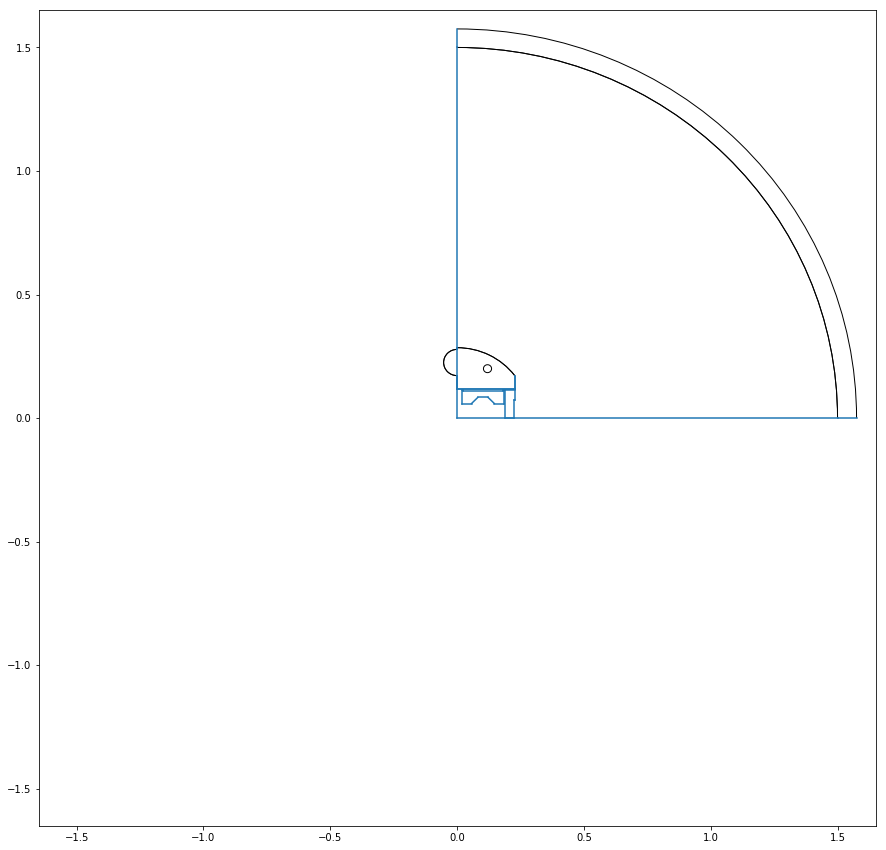

In [7]:
# iron yoke holes
mm = 0.001

rhole2 = 16*mm
xhole2 = 120*mm
yhole2 = 200*mm

kpc = Point.ofCartesian(xhole2, yhole2)

hole2 = Circumference.ofCenterRadius(kpc, rhole2)

ar5 = Area.ofHyperLines(a.create_hyper_line_array(gateway, (hole2)))

el5 = Element("IY_El4_HOLE1", ar5)


iron_yoke_holes = a.create_element_array(gateway, (el5))

p.plot_multiple_areas(ax, [ar5])
fig

In [8]:
# High-field cable parameters
wBare = 12.6e-3
dstrand = 1.1e-3
thetaTpStrand = 15*np.pi/180

cableHF = Cable()
cableHF.setLabel("cable_HF_FCC")
cableHF.setwInsulNarrow(1.5e-4)
cableHF.setwInsulWide(1.5e-4)
cableHF.setdFilament(50e-6)
cableHF.setDstrand(1.1e-3)
CuScRatio = 0.8
cableHF.setFracCu(1/(1+(1/CuScRatio)))
cableHF.setFracSc(1/(1+CuScRatio))
cableHF.setRRR(100.0)
cableHF.setTupRRR(295.0)
cableHF.setTop(1.9)
cableHF.setRc(100e-6)
cableHF.setRa(100e-6)
cableHF.setfRhoEff(1.0)
cableHF.setlTp(14e-3)
cableHF.setwBare(12.6e-3)
cableHF.sethInBare(2e-3)
cableHF.sethOutBare(2e-3)
cableHF.setNoOfStrands(21)
cableHF.setNoOfStrandsPerLayer(10)
cableHF.setNoOfLayers(2)
cableHF.setwCore(0.0)
cableHF.sethCore(0.0)
cableHF.setThetaTpStrand(15*np.pi/180)
cableHF.setlTpStrand(2*(wBare-dstrand)/math.tan(thetaTpStrand))
cableHF.setC1(0.0)
cableHF.setC2(0.0)
cableHF.setFracHe(0.0)
cableHF.setFracFillInnerVoids(1.0)
cableHF.setFractFillOuterVoids(1.0)
cableHF.setCriticalSurfaceFit(Cable.CriticalSurfaceFitEnum.Ic_Nb3Sn_FCC)
cableHF.setInsulationMaterial(MatDatabase.MAT_GLASSFIBER)
cableHF.setMaterialInnerVoids(MatDatabase.MAT_GLASSFIBER)
cableHF.setMaterialOuterVoids(MatDatabase.MAT_GLASSFIBER)
cableHF.setMaterialCore(MatDatabase.MAT_VOID)
cableHF.setResitivityCopperFit(Cable.ResitivityCopperFitEnum.rho_Cu_NIST)

JavaObject id=o377

In [9]:
# Low-field cable parameters
wBare = 12.6e-3
dstrand = 0.7e-3
thetaTpStrand = 15*np.pi/180

cableLF = Cable()
cableLF.setLabel("cable_LF_FCC")
cableLF.setwInsulNarrow(1.5e-4)
cableLF.setwInsulWide(1.5e-4)
cableLF.setdFilament(50e-6)
cableLF.setDstrand(0.7e-3)
CuScRatio = 2
cableLF.setFracCu(1/(1+(1/CuScRatio)))
cableLF.setFracSc(1/(1+CuScRatio))
cableLF.setRRR(100.0)
cableLF.setTupRRR(295.0)
cableLF.setTop(1.9)
cableLF.setRc(100e-6)
cableLF.setRa(100e-6)
cableLF.setfRhoEff(1.0)
cableLF.setlTp(14e-3)
cableLF.setwBare(12.6e-3)
cableLF.sethInBare(1.27e-3)
cableLF.sethOutBare(1.27e-3)
cableLF.setNoOfStrands(34)
cableLF.setNoOfStrandsPerLayer(17)
cableLF.setNoOfLayers(2)
cableLF.setwCore(0.0)
cableLF.sethCore(0.0)
cableLF.setThetaTpStrand(15*np.pi/180)
cableLF.setlTpStrand(2*(wBare-dstrand)/math.tan(thetaTpStrand))
cableLF.setC1(0.0)
cableLF.setC2(0.0)
cableLF.setFracHe(0.0)
cableLF.setFracFillInnerVoids(1.0)
cableLF.setFractFillOuterVoids(1.0)
cableLF.setCriticalSurfaceFit(Cable.CriticalSurfaceFitEnum.Ic_Nb3Sn_FCC)
cableLF.setInsulationMaterial(MatDatabase.MAT_GLASSFIBER)
cableLF.setMaterialInnerVoids(MatDatabase.MAT_GLASSFIBER)
cableLF.setMaterialOuterVoids(MatDatabase.MAT_GLASSFIBER)
cableLF.setMaterialCore(MatDatabase.MAT_VOID)
cableLF.setResitivityCopperFit(Cable.ResitivityCopperFitEnum.rho_Cu_NIST)

JavaObject id=o419

## Coil

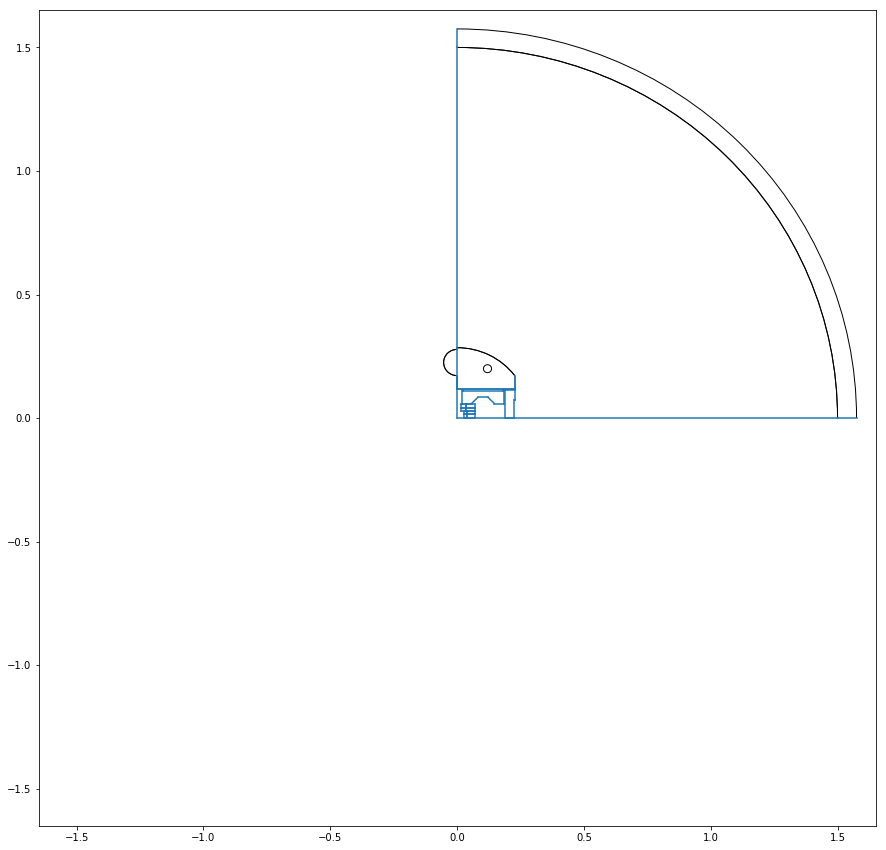

In [10]:
dyMechanical = 0
dyReducedShim = 70e-6
interBeamDistance = 204e-3

kp11 = Point.ofCartesian(38.40e-3, 15.25e-3)
kp12 = Point.ofCartesian(26.90e-3, 15.25e-3)
kp13 = Point.ofCartesian(26.90e-3, 02.35e-3-dyMechanical)
kp14 = Point.ofCartesian(38.40e-3, 02.35e-3-dyMechanical)

kp21 = Point.ofCartesian(38.40e-3, 28.65e-3)
kp22 = Point.ofCartesian(26.90e-3, 28.65e-3)
kp23 = Point.ofCartesian(26.90e-3, 15.75e-3-dyMechanical)
kp24 = Point.ofCartesian(38.40e-3, 15.75e-3-dyMechanical)

kp31 = Point.ofCartesian(36.83e-3, 42.05e-3)
kp32 = Point.ofCartesian(13.83e-3, 42.05e-3)
kp33 = Point.ofCartesian(13.83e-3, 29.15e-3-dyMechanical)
kp34 = Point.ofCartesian(36.83e-3, 29.15e-3-dyMechanical)

kp41 = Point.ofCartesian(36.83e-3, 55.45e-3)
kp42 = Point.ofCartesian(13.83e-3, 55.45e-3)
kp43 = Point.ofCartesian(13.83e-3, 42.55e-3-dyMechanical)
kp44 = Point.ofCartesian(36.83e-3, 42.55e-3-dyMechanical)

kp51 = Point.ofCartesian(71.37e-3, 15.25e-3)
kp52 = Point.ofCartesian(38.40e-3, 15.25e-3)
kp53 = Point.ofCartesian(38.40e-3, 02.35e-3-dyMechanical)
kp54 = Point.ofCartesian(71.37e-3, 02.35e-3-dyMechanical)

kp61 = Point.ofCartesian(71.37e-3, 28.65e-3)
kp62 = Point.ofCartesian(38.40e-3, 28.65e-3)
kp63 = Point.ofCartesian(38.40e-3, 15.75e-3-dyMechanical)
kp64 = Point.ofCartesian(71.37e-3, 15.75e-3-dyMechanical)

kp71 = Point.ofCartesian(71.37e-3, 42.05e-3)
kp72 = Point.ofCartesian(36.83e-3, 42.05e-3)
kp73 = Point.ofCartesian(36.83e-3, 29.15e-3-dyMechanical)
kp74 = Point.ofCartesian(71.37e-3, 29.15e-3-dyMechanical)

kp81 = Point.ofCartesian(71.37e-3, 55.45e-3)
kp82 = Point.ofCartesian(36.83e-3, 55.45e-3)
kp83 = Point.ofCartesian(36.83e-3, 42.55e-3-dyMechanical)
kp84 = Point.ofCartesian(71.37e-3, 42.55e-3-dyMechanical)

ln11 = Line.ofEndPoints(kp12, kp11)
ln12 = Line.ofEndPoints(kp12, kp13)
ln13 = Line.ofEndPoints(kp13, kp14)
ln14 = Line.ofEndPoints(kp11, kp14)

ln21 = Line.ofEndPoints(kp22, kp21)
ln22 = Line.ofEndPoints(kp22, kp23)
ln23 = Line.ofEndPoints(kp23, kp24)
ln24 = Line.ofEndPoints(kp21, kp24)

ln31 = Line.ofEndPoints(kp32, kp31)
ln32 = Line.ofEndPoints(kp32, kp33)
ln33 = Line.ofEndPoints(kp33, kp34)
ln34 = Line.ofEndPoints(kp31, kp34)

ln41 = Line.ofEndPoints(kp42, kp41)
ln42 = Line.ofEndPoints(kp42, kp43)
ln43 = Line.ofEndPoints(kp43, kp44)
ln44 = Line.ofEndPoints(kp41, kp44)

ln51 = Line.ofEndPoints(kp52, kp51)
ln52 = Line.ofEndPoints(kp52, kp53)
ln53 = Line.ofEndPoints(kp53, kp54)
ln54 = Line.ofEndPoints(kp51, kp54)

ln61 = Line.ofEndPoints(kp62, kp61)
ln62 = Line.ofEndPoints(kp62, kp63)
ln63 = Line.ofEndPoints(kp63, kp64)
ln64 = Line.ofEndPoints(kp61, kp64)

ln71 = Line.ofEndPoints(kp72, kp71)
ln72 = Line.ofEndPoints(kp72, kp73)
ln73 = Line.ofEndPoints(kp73, kp74)
ln74 = Line.ofEndPoints(kp71, kp74)

ln81 = Line.ofEndPoints(kp82, kp81)
ln82 = Line.ofEndPoints(kp82, kp83)
ln83 = Line.ofEndPoints(kp83, kp84)
ln84 = Line.ofEndPoints(kp81, kp84)

ha11p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln11, ln12, ln13, ln14)))
ha12p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln21, ln22, ln23, ln24)))
ha13p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln31, ln32, ln33, ln34)))
ha14p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln41, ln42, ln43, ln44)))
ha15p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln51, ln52, ln53, ln54)))
ha16p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln61, ln62, ln63, ln64)))
ha17p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln71, ln72, ln73, ln74)))
ha18p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln81, ln82, ln83, ln84)))
 
ha11n = ha11p.mirrorY()
ha12n = ha12p.mirrorY() 
ha13n = ha13p.mirrorY()
ha14n = ha14p.mirrorY()
ha15n = ha15p.mirrorY()
ha16n = ha16p.mirrorY()
ha17n = ha17p.mirrorY()
ha18n = ha18p.mirrorY()
 
w11 = Winding.ofAreas(a.create_area_array(gateway, (ha11p, ha11n)), a.create_int_array(gateway, (+1, -1)), 5, 5, cableHF)
w12 = Winding.ofAreas(a.create_area_array(gateway, (ha12p, ha12n)), a.create_int_array(gateway, (+1, -1)), 5, 5, cableHF)
w13 = Winding.ofAreas(a.create_area_array(gateway, (ha13p, ha13n)), a.create_int_array(gateway, (+1, -1)), 10, 10, cableHF)
w14 = Winding.ofAreas(a.create_area_array(gateway, (ha14p, ha14n)), a.create_int_array(gateway, (+1, -1)), 10, 10, cableHF)
w15 = Winding.ofAreas(a.create_area_array(gateway, (ha15p, ha15n)), a.create_int_array(gateway, (+1, -1)), 21, 21, cableLF)
w16 = Winding.ofAreas(a.create_area_array(gateway, (ha16p, ha16n)), a.create_int_array(gateway, (+1, -1)), 21, 21, cableLF)
w17 = Winding.ofAreas(a.create_area_array(gateway, (ha17p, ha17n)), a.create_int_array(gateway, (+1, -1)), 22, 22, cableLF)
w18 = Winding.ofAreas(a.create_area_array(gateway, (ha18p, ha18n)), a.create_int_array(gateway, (+1, -1)), 22, 22, cableLF)
 
w11 = w11.reverseWindingDirection()
w14 = w14.reverseWindingDirection()
w15 = w15.reverseWindingDirection()
w18 = w18.reverseWindingDirection()

poles = Pole.ofWindings(a.create_winding_array(gateway, (w15, w11, w12, w16, w18, w14, w13, w17))).translate(0.0, -dyReducedShim)

coil = Coil.ofPoles(a.create_pole_array(gateway, (poles)))
coil = coil.translate(interBeamDistance/2.0, 0.0)

p.plot_multiple_areas(ax, [ha11p, ha12p, ha13p, ha14p, 
                         ha15p, ha16p, ha17p, ha18p])
fig

In [11]:
# Assemble domains together
domains = a.create_domain_array(gateway, (AirDomain("airDomain", MatDatabase.MAT_AIR, air),
                AirFarFieldDomain("airFarFieldDomain", MatDatabase.MAT_AIR, air_far_field),
                CoilDomain("coil", MatDatabase.MAT_COIL, coil),
                IronDomain("ironYoke", MatDatabase.MAT_IRON1, iron_yoke),
                HoleDomain("holesYoke", MatDatabase.MAT_AIR, iron_yoke_holes)))

In [12]:
# Create magnet model
cfg = ConfigSigma()
cfg.setOutputModelPath("MagnetModel.java")
cfg.setExternalCFunLibPath("U:\\STEAM\\MaterialsLibrary")

srv = TxtSigmaServer(cfg.getOutputModelPath(), cfg.getComsolBatchPath())
srv.connect(cfg.getComsolBatchPath())
m = MagnetMPHBuilder(cfg, srv)
m.buildMPH(domains)
m.save()

# Steps for the STEAM-SIGMA documentation to complete a model
<img src="../SolverSettings.PNG">
<img src="../PhysicsSettings.PNG">

# Magnetic field distribution


# Extract differential inductance as a function of current

# Calculate differential inductance matrix

# Create equivalent electrical network with STEAM - preconditioner

# Create circuit to be coupled to